**Import Libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

# to scale the data using z-score
from scipy.stats import zscore

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
from scipy.spatial.distance import pdist

# to perform PCA
from sklearn.decomposition import PCA

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mount and connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Import dataset "used_cars_data.csv"
data_original = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Credit+Card+Customer+Data.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Make a copy of the original dataset.

In [ ]:
#Copy data
data = data_original.copy()

**Data Analysis**

In [ ]:
#Data shape
data.shape

(660, 7)

In [ ]:
#Number of rows and columns
print(f'Number of rows: {data.shape[0]} and Number of columns: {data.shape[1]}')

Number of rows: 660 and Number of columns: 7


In [ ]:
#Review sample of dataset
data.sample(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
544,545,85645,54000,6,3,1,2
486,487,95147,64000,4,2,2,2
594,595,93381,60000,4,2,1,4
119,120,93997,9000,3,0,4,9
66,67,85868,19000,2,0,3,6
464,465,36504,52000,4,2,1,2
646,647,58392,186000,7,0,8,1
449,450,14816,36000,4,3,2,3
580,581,90586,52000,4,5,2,1
480,481,76024,47000,6,2,0,0


In [ ]:
#Review the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations**

All seven features in the dataset are type int64

In [ ]:
#Review unique values
pd.DataFrame(data.nunique())

,0
Sl_No,660
Customer Key,655
Avg_Credit_Limit,110
Total_Credit_Cards,10
Total_visits_bank,6
Total_visits_online,16
Total_calls_made,11


**Obseravtions**

*   There are 660 unique values in the S1_No feature
*   There are 655 unique values in the Customer Key feature
*   There are 110 unique values in the Avg_Credit_Limit feature
*   There are 10 unique values in the Total_Credit_Card feature
*   There are 6 unique values in the Total_visits_bank feature
*   There are 16 unique values in the Total_visits_online feature
*   There are 11 unique values in the Total_calls_made feature

In [ ]:
#Review of duplicate values in the data
data.duplicated().sum()

0

**Observations**

There is 0 duplicated data in the dataset. It is intersting to note however, that there are 655 unique values in the Customer Key column and there are 660 rows. Let's explore this a bit further.

In [ ]:
#Checking for duplication in the Customer Key Column
data[data['Customer Key'].isin(data[data['Customer Key'].duplicated()]['Customer Key'].tolist())].sort_values('Customer Key')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


**Observations**

Looks like there is some duplication in this column, however it doesn't appear that this column or the S1_No column will add any value to the model creation. We will drop these two columns

In [ ]:
#Drop the Sl_No and Customer Key columns
data.drop(['Sl_No','Customer Key'],axis=1,inplace=True)

In [ ]:
#Review missing data
data.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

**Obseravtions**

There is no missing data in the dataset

In [ ]:
#Statistical analysis of the numerical data columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


**Observations**

*Avg_Credit_Limit*

*   **Mean:** 34,574
*   **Min:** 3,000
*   **Max:** 200,000

*Total_Credit_Cards*

*   **Mean:** 4.7
*   **Min:** 1
*   **Max:** 10

*Total_visits_bank*

*   **Mean:** 2.4
*   **Min:** 0
*   **Max:** 5

*Total_visits_online*

*   **Mean:** 2.6
*   **Min:** 0
*   **Max:** 15

*Total_calls_made*

*   **Mean:** 3.6 
*   **Min:** 0
*   **Max:** 10


## **Univariate Analysis**

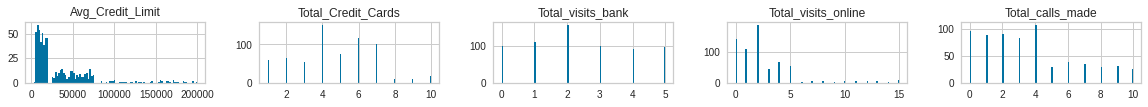

In [ ]:
#View the continuous data 
columns = list(data)[0:]
data[columns].hist(stacked=False, bins=100, figsize=(20,20), layout=(14,5));

In [ ]:
#Create a function for univariate analysis (code used from Class Module)
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    ) 
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")

In [ ]:
#Create function for outlier identification
def feature_outliers(feature: str, data = data):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

**Avg_Credit_Limit**

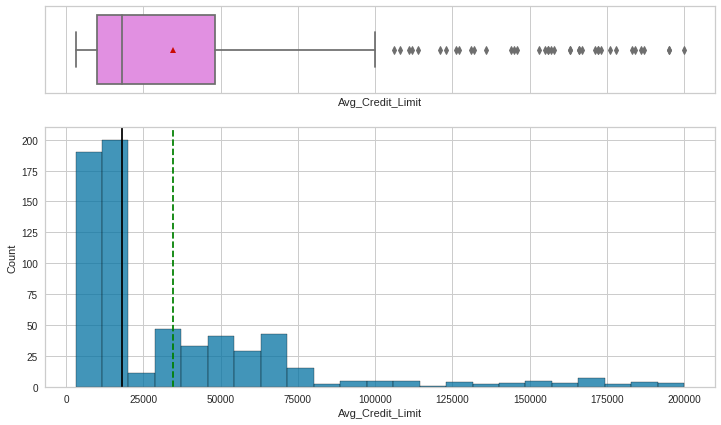

In [ ]:
#Histogram/Boxplot for Avg_Credit_Limit analysis
histogram_boxplot(data, "Avg_Credit_Limit")

In [ ]:
#Mean of Avg_Credit_Limit
data.Avg_Credit_Limit.mean()

34574.242424242424

In [ ]:
#Median of Avg_Credit_Limit
data.Avg_Credit_Limit.median()

18000.0

In [ ]:
#Mode of Avg_Credit_Limit
data.Avg_Credit_Limit.mode()

0    8000
dtype: int64

In [ ]:
#Evaluate outliers of Avg_Credit_Limit
acl_outliers = feature_outliers('Avg_Credit_Limit')
acl_outliers.sort_values(by = 'Avg_Credit_Limit', ascending = False)
acl_outliers.value_counts().sum()

39

**Observations**

* The mean value for Avg_Credit_Limit is 34,574
* The median value for Avg_Credit_Limit is 18,000
* The mode value for Avg_Credit_Limit is 8,000
* There are 39 outliers in the Avg_Credit_Limit column which will be addressed by standarization later

**Total_Credit_Cards**

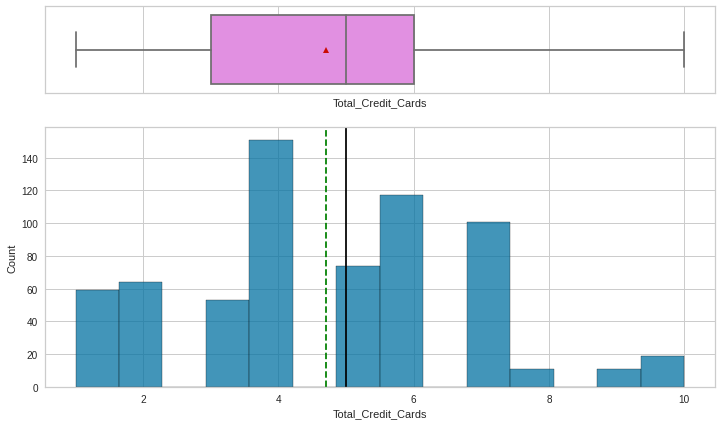

In [ ]:
#Histogram/Boxplot for Total_Credit_Cards analysis
histogram_boxplot(data, "Total_Credit_Cards")

In [ ]:
#Mean of Total_Credit_Cards
data.Total_Credit_Cards.mean()

4.706060606060606

In [ ]:
#Median of Total_Credit_Cards
data.Total_Credit_Cards.median()

5.0

In [ ]:
#Mode of Total_Credit_Cards
data.Total_Credit_Cards.mode()

0    4
dtype: int64

In [ ]:
#Evaluate outliers of Avg_Credit_Limit
tcc_outliers = feature_outliers('Total_Credit_Cards')
tcc_outliers.sort_values(by = 'Total_Credit_Cards', ascending = False)
tcc_outliers.value_counts().sum()

0

**Observations**

* The mean value for Total_Credit_Cards is 4.7
* The median value for Total_Credit_Cards is 5
* The mode value for Total_Credit_Cards is 4
* There are 0 outliers in the Total_Credit_Cards column

**Total_visits_bank**

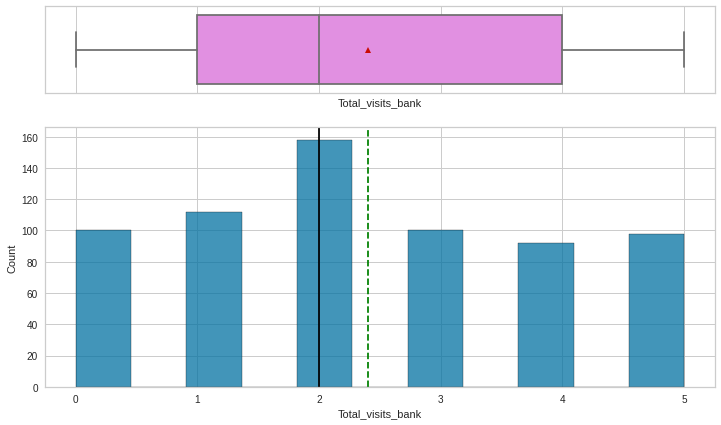

In [ ]:
#Histogram/Boxplot for Total_visits_bank analysis
histogram_boxplot(data, "Total_visits_bank")

In [ ]:
#Mean of Total_visits_bank
data.Total_visits_bank.mean()

2.403030303030303

In [ ]:
#Median of Total_visits_bank
data.Total_visits_bank.median()

2.0

In [ ]:
#Mode of Total_visits_bank
data.Total_visits_bank.mode()

0    2
dtype: int64

In [ ]:
#Evaluate outliers of Total_visits_bank
tvb_outliers = feature_outliers('Total_visits_bank')
tvb_outliers.sort_values(by = 'Total_visits_bank', ascending = False)
tvb_outliers.value_counts().sum()

0

**Observations**

* The mean value for Total_visits_bank is 2.4
* The median value for Total_visits_bank is 2
* The mode value for Total_visits_bank is 2
* There are 0 outliers in the Total_visits_bank column

**Total_visits_online**

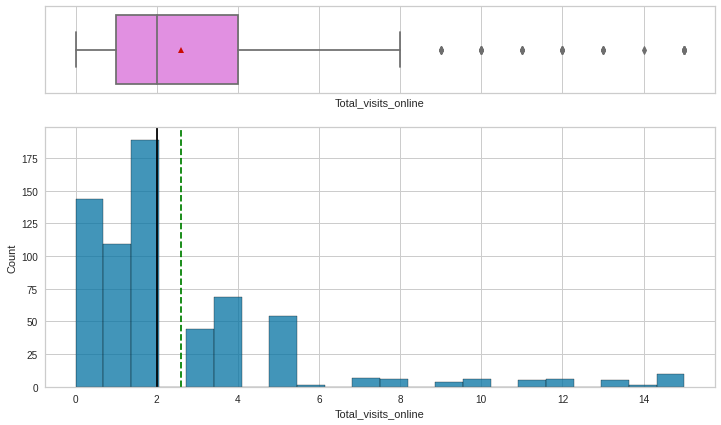

In [ ]:
#Histogram/Boxplot for Total_visits_online analysis
histogram_boxplot(data, "Total_visits_online")

In [ ]:
#Mean of Total_visits_online
data.Total_visits_online.mean()

2.606060606060606

In [ ]:
#Median of Total_visits_online
data.Total_visits_online.median()

2.0

In [ ]:
#Mode of Total_visits_online
data.Total_visits_online.mode()

0    2
dtype: int64

In [ ]:
#Evaluate outliers of Total_visits_online
tvo_outliers = feature_outliers('Total_visits_online')
tvo_outliers.sort_values(by = 'Total_visits_online', ascending = False)
tvo_outliers.value_counts().sum()

37

**Observations**

* The mean value for Total_visits_online is 2.6
* The median value for Total_visits_online is 2
* The mode value for Total_visits_online is 2
* There are 37 outliers in the Total_visits_online column which will be addressed by standarization later

**Total_calls_made**

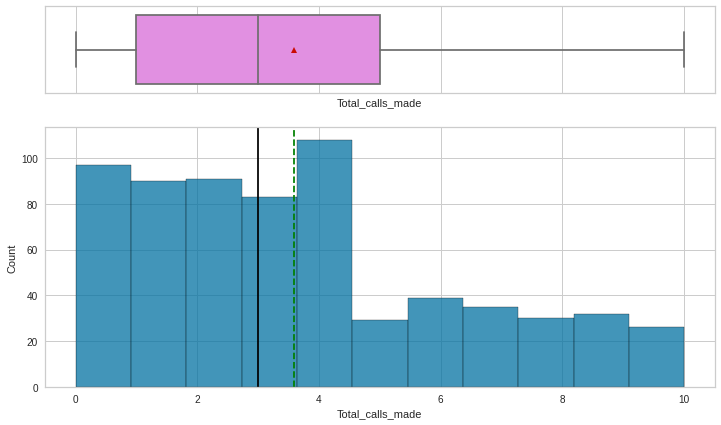

In [ ]:
#Histogram/Boxplot for Total_calls_made analysis
histogram_boxplot(data, "Total_calls_made")

In [ ]:
#Mean of Total_calls_made
data.Total_calls_made.mean()

3.5833333333333335

In [ ]:
#Median of Total_calls_made
data.Total_calls_made.median()

3.0

In [ ]:
#Mode of Total_calls_made
data.Total_calls_made.mode()

0    4
dtype: int64

In [ ]:
#Evaluate outliers of Total_calls_made
tcm_outliers = feature_outliers('Total_calls_made')
tcm_outliers.sort_values(by = 'Total_calls_made', ascending = False)
tcm_outliers.value_counts().sum()

0

**Observations**

* The mean value for Total_calls_made is 3.6
* The median value for Total_calls_made is 3
* The mode value for Total_calls_made is 4
* There are 0 outliers in the Total_calls_made column

## **Bivariate Analysis**

In [ ]:
#Function for Bivariate analysis (code taken from class notes)
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

We will create bins for Avg_Credit_Limit for better EDA.

In [ ]:
#Create bins for Avg_Credit_Limit
data['Avg_Credit_Bin'] = pd.cut(data['Avg_Credit_Limit'], bins=[3000,	20000,	50000, 	100000,	200000], labels=['Low', 'Medium', 'High', 'Very High'], include_lowest=True)

Avg_Credit_Bin      Low  Medium  High  Very High  All
Total_Credit_Cards                                   
All                 390     118   113         39  660
10                    0       0     5         14   19
8                     0       0     1         10   11
9                     0       0     3          8   11
7                    35      32    27          7  101
1                    59       0     0          0   59
2                    63       0     1          0   64
3                    52       1     0          0   53
4                    95      27    29          0  151
5                    31      26    17          0   74
6                    55      32    30          0  117
------------------------------------------------------------------------------------------------------------------------


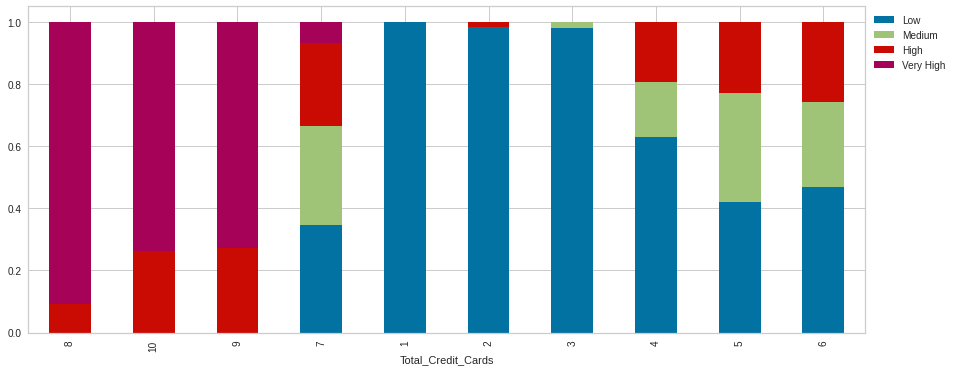

In [ ]:
#Barplot of Total_Credit_Cards by Avg_Credit_Bin
stacked_barplot(data, "Total_Credit_Cards", "Avg_Credit_Bin")

**Observations**

*   Customers with very high credit limits have more credit cards
*   As the average credit limit increases, the number of credit cards also increases



Avg_Credit_Bin     Low  Medium  High  Very High  All
Total_visits_bank                                   
All                390     118   113         39  660
1                   79       2     8         23  112
0                   79       1     4         16  100
2                  104      21    33          0  158
3                   38      33    29          0  100
4                   40      32    20          0   92
5                   50      29    19          0   98
------------------------------------------------------------------------------------------------------------------------


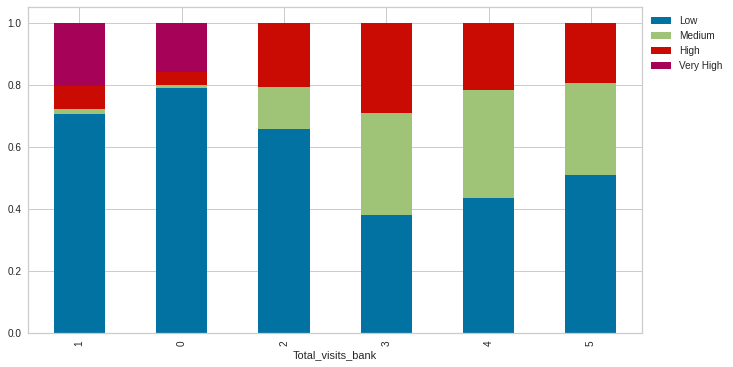

In [ ]:
#Barplot of Total_visits_bank by Avg_Credit_Bin
stacked_barplot(data, "Total_visits_bank", "Avg_Credit_Bin")

**Observations**

*   Customers with lower average credit limits visit the bank more frequently



Avg_Credit_Bin       Low  Medium  High  Very High  All
Total_visits_online                                   
All                  390     118   113         39  660
15                     0       0     2          8   10
7                      0       0     0          7    7
12                     0       0     1          5    6
8                      0       0     1          5    6
10                     0       1     1          4    6
13                     0       0     1          4    5
9                      0       0     1          3    4
11                     0       0     3          2    5
14                     0       0     0          1    1
5                     54       0     0          0   54
6                      0       0     1          0    1
4                     69       0     0          0   69
1                     46      34    29          0  109
3                     43       1     0          0   44
2                    116      44    29          0  189
0         

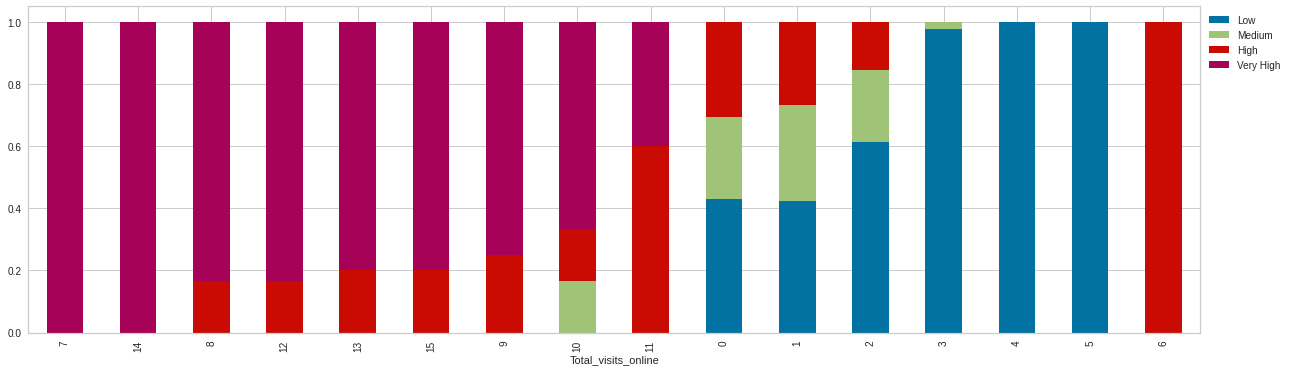

In [ ]:
#Barplot of Total_visits_online by Avg_Credit_Bin
stacked_barplot(data, "Total_visits_online", "Avg_Credit_Bin")

**Observations**

*   Higher average credit limit customers appear to prefer to utilize online banking



Avg_Credit_Bin    Low  Medium  High  Very High  All
Total_calls_made                                   
All               390     118   113         39  660
0                  36      21    27         13   97
1                  40      20    17         13   90
2                  27      27    24         13   91
3                  33      27    23          0   83
4                  64      22    22          0  108
5                  29       0     0          0   29
6                  39       0     0          0   39
7                  35       0     0          0   35
8                  30       0     0          0   30
9                  31       1     0          0   32
10                 26       0     0          0   26
------------------------------------------------------------------------------------------------------------------------


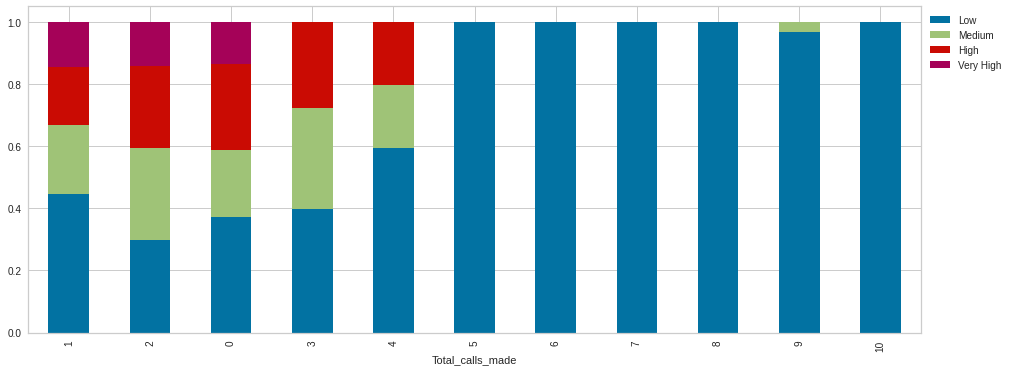

In [ ]:
#Barplot of Total_calls_made by Avg_Credit_Bin
stacked_barplot(data, "Total_calls_made", "Avg_Credit_Bin")

**Observations**

*   Customers with the lowest average credit limits call the banks customer service much more frequently



Now that we completed EDA, we will drop the Avg_Credit_Bin column.

In [ ]:
#Drop the Avg_Credit_Bin column
data.drop(['Avg_Credit_Bin'],axis=1,inplace=True)

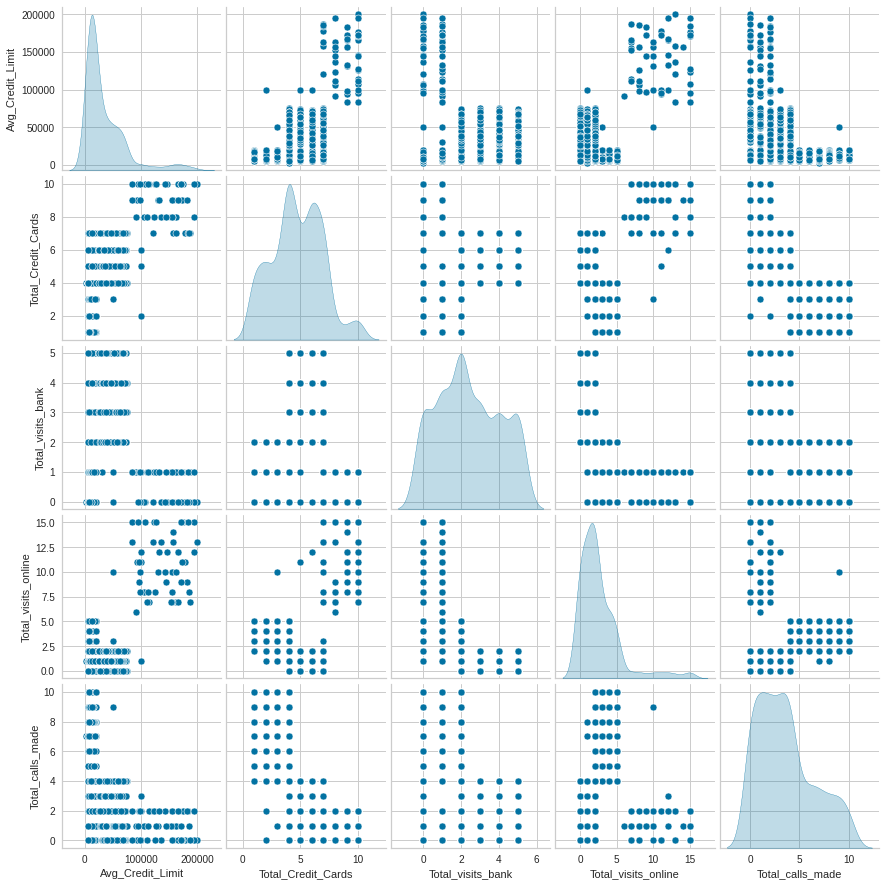

In [ ]:
#Pairplot of all the numeric features
sns.pairplot(data,diag_kind='kde');

In [ ]:
#Correlation
data.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


**Observations**

*   The highest correlation is between average credit limit and total number of credit cards. There is a positive correlation of 0.61
*   There is also a postive correlation of 0.55 between the average credit limit and total visits online which we identified that customers with the higher limits are more likely to leverage online banking above
*  The smallest correlation is between average credit limit and total visits to the bank - this is a negative correlation of -0.10



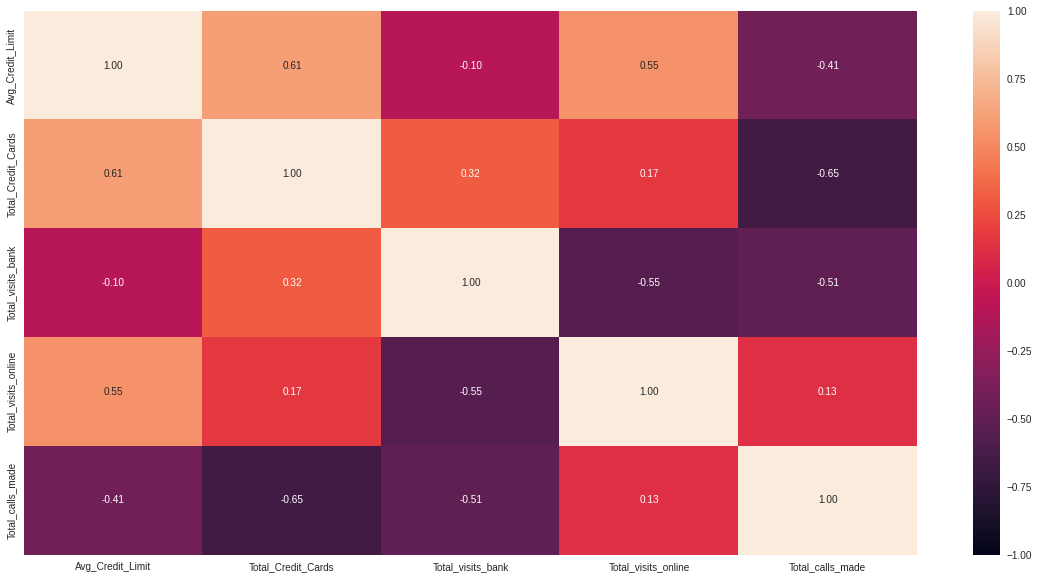

In [ ]:
#Heatmap for correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

**Applying K-means Clustering**

We will use the z-score to standarize the data.

In [ ]:
#Scaling the data using the z-score
data_z_score = data.apply(zscore)
data_z_score = pd.DataFrame(data_z_score, columns=data.columns)

In [ ]:
#Review a sample of the scaled data
data_z_score.sample(5)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
189,-0.760014,-0.787585,-0.24717,0.13429,0.494794
233,-0.573829,1.058973,-0.24717,-0.54749,-1.251537
93,-0.706819,-1.710864,-0.24717,0.81607,1.193326
575,1.022044,0.135694,0.36611,-0.88838,0.145528
463,0.091118,-0.325946,1.59267,-0.54749,0.145528


Number of Clusters: 1 	Average Distortion: 2.006922226250361
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9431590010817001
Number of Clusters: 7 	Average Distortion: 0.9095661498049185
Number of Clusters: 8 	Average Distortion: 0.8893736336416194
Number of Clusters: 9 	Average Distortion: 0.8690993152651708


Text(0.5, 1.0, 'Selecting K with the Elbow Method')

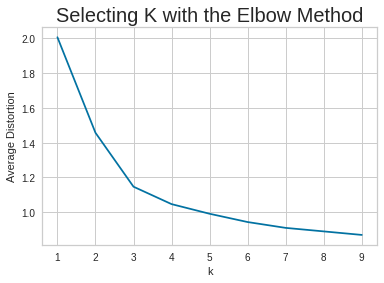

In [ ]:
#Create for loop for clusters
clusters = range(1, 10)
#Create a empty list
meanDistortions = []  

for k in clusters:
    #Initialize KMeans
    model = KMeans(n_clusters=k)
    #Fit kMeans on the data  
    model.fit(data_z_score)
    #Predict the model on the data  
    prediction = model.predict(data_z_score)
    #Find distortion  
    distortion = (sum(np.min(cdist(data_z_score, model.cluster_centers_, "euclidean"), axis=1))/data_z_score.shape[0])
    #Append distortion values to the empty list created above
    meanDistortions.append(distortion)  
    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
#Title of X-axis
plt.xlabel("k")  
#Title of y-axis
plt.ylabel("Average Distortion")  
#Title of the plot
plt.title("Selecting K with the Elbow Method", fontsize=20)  

**Observations**

The clearest bend utilizing the elbow method appears to be at 3. We will use three clusters in our model.

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717835112303572
For n_clusters = 6, silhouette score is 0.25545029453623114
For n_clusters = 7, silhouette score is 0.2482713393360752
For n_clusters = 8, silhouette score is 0.24116731200249752
For n_clusters = 9, silhouette score is 0.2260880038623113


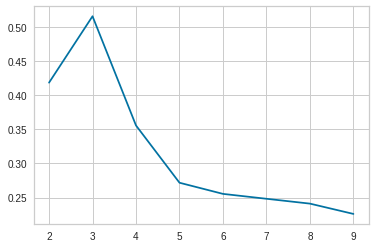

In [ ]:
#Create empty list
sil_score = []
#Creating a list of range from 2 to 10
cluster_list = list(range(2, 10))  
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((data_z_score))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(data_z_score, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**Observations**

The best silhouette score is for n_clusters = 3, with a silhouette score of 0.5157182558881063

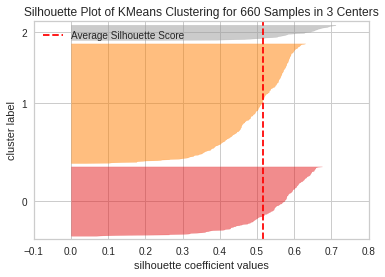

In [ ]:
#Optimal no. of clusters with silhouette coefficients (3)
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(data_z_score)
visualizer.show()

**Observations**

From the above plot, we can see that all the clusters have crossed avg silhouette score, all the clusters have different silhouette scores and have different width sizes, and there is an elbow at K=3, so k=3 will  be an appropriate value.

In [ ]:
#KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 0)

In [ ]:
#Fitting the KMeans to the standardized data
kmeans.fit(data_z_score)

KMeans(n_clusters=3, random_state=0)

In [ ]:
#Adding the KMeans cluster labels to the original dataframe and scaled dataframes
data["K_means_segments"] = kmeans.labels_
data_z_score["K_means_segments"] = kmeans.labels_

**Cluster Profiling for KMeans**

In [ ]:
#Create grouped cluster profilrt
cluster_profile = data.groupby("K_means_segments").mean()

In [ ]:
#Display cluster profiles
cluster_profile.style.highlight_max(color="green", axis=0).highlight_min(color='red')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


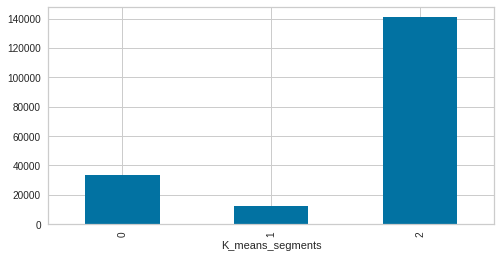

In [ ]:
# Checking the groups for Avg_Credit_Limit
cluster_profile['Avg_Credit_Limit'].groupby('K_means_segments').mean().plot.bar(figsize=(8,4));

**Observations**

Cluster 2 is the largest - in fact, bigger than cluster 0 and cluster 1 combined.

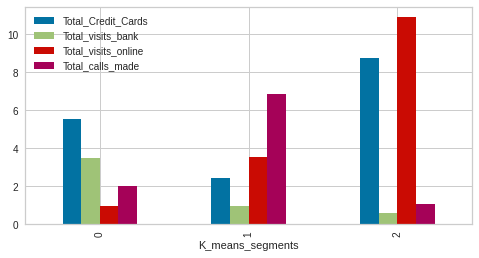

In [ ]:
#Checking the groups for the remainder features
cluster_profile[['Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made']].groupby('K_means_segments').mean().plot.bar(figsize=(8,4));

**Observations**

*   Total_Credit_cards make up the largest feature in Cluster 0, followed by total_visits_bank, total_calls_made, and total_visits_onlne
*   Total_calls_made make up the largest feature in Cluster 1, followed by total_visits_onlne, total_calls_made, and total_visits_bank
*   Total_visits_online make up the largest feature in Cluster 2, followed by total_credit_card, total_calls_made, and total_visits_bank



In [ ]:
#Identify the centroids
centroids = kmeans.cluster_centers_

In [ ]:
#Drop K_means_segments
data_z_score.drop('K_means_segments', axis=1, inplace=True)

In [ ]:
#Create dataframe for centroids
centroid_df = pd.DataFrame(centroids, columns = list(data_z_score))
centroid_df 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.021062,0.373690,0.666395,-0.553672,-0.553005
1,-0.595796,-1.059623,-0.901518,0.322997,1.148109
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


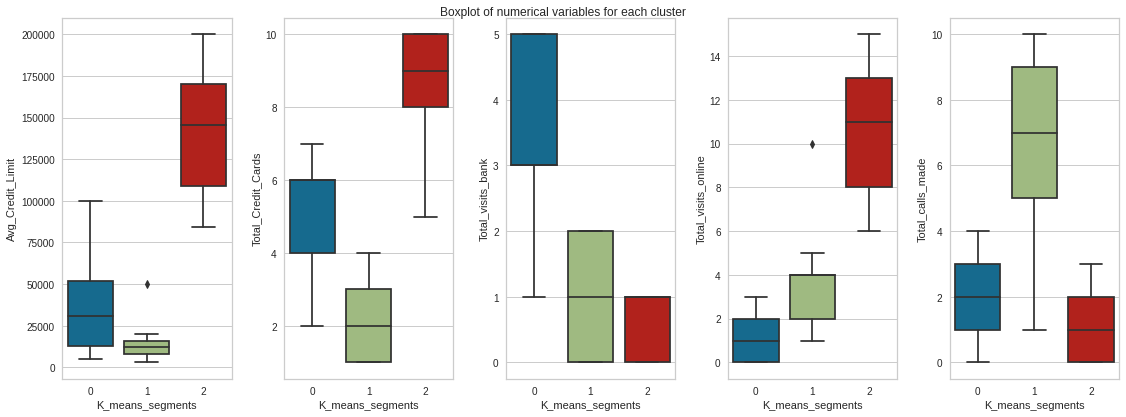

In [ ]:
#Plot cluster profiles
list_columns =  cluster_profile.columns
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for a in range(5):
    sns.boxplot(ax = axes[a], y = data[list_columns[counter]], x = data['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observations**

* **Cluster 0**

    * **Avg_Credit_Limit:** Second highest number of clients
    * **Total_Credit_Cards:** Second highest number of clients
    * **Total_visits_bank:** Customers who visit the bank the most
    * **Total_visits_online:** Customers who use online banking the least
    * **Total_calls_made:** Second highest number of clients

* **Cluster 1**

    * **Avg_Credit_Limit:** Customers who have the lowest avg credit limits
    * **Total_Credit_Cards:** Lowest number of credit card
    * **Total_visits_bank:** Second highest number of clients
    * **Total_visits_online:** Second highest number of clients
    * **Total_calls_made:** Customers making the most amount of calls to the bank

* **Cluster 2**
    * **Avg_Credit_Limit:** The highest average limits by customer
    * **Total_Credit_Cards:** This has the most credit cards by customers 
    * **Total_visits_bank:** This has the most clients visiting the  bank
    * **Total_visits_online:** This has the most clients using online banking
    * **Total_calls_made:** This has the least number of calls made by clients to the bank







**Hierarchical Clustering**

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_z_score, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(data_z_score))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [ ]:
#Print the distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]))

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


In [ ]:
#Linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(data_z_score, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(data_z_score))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


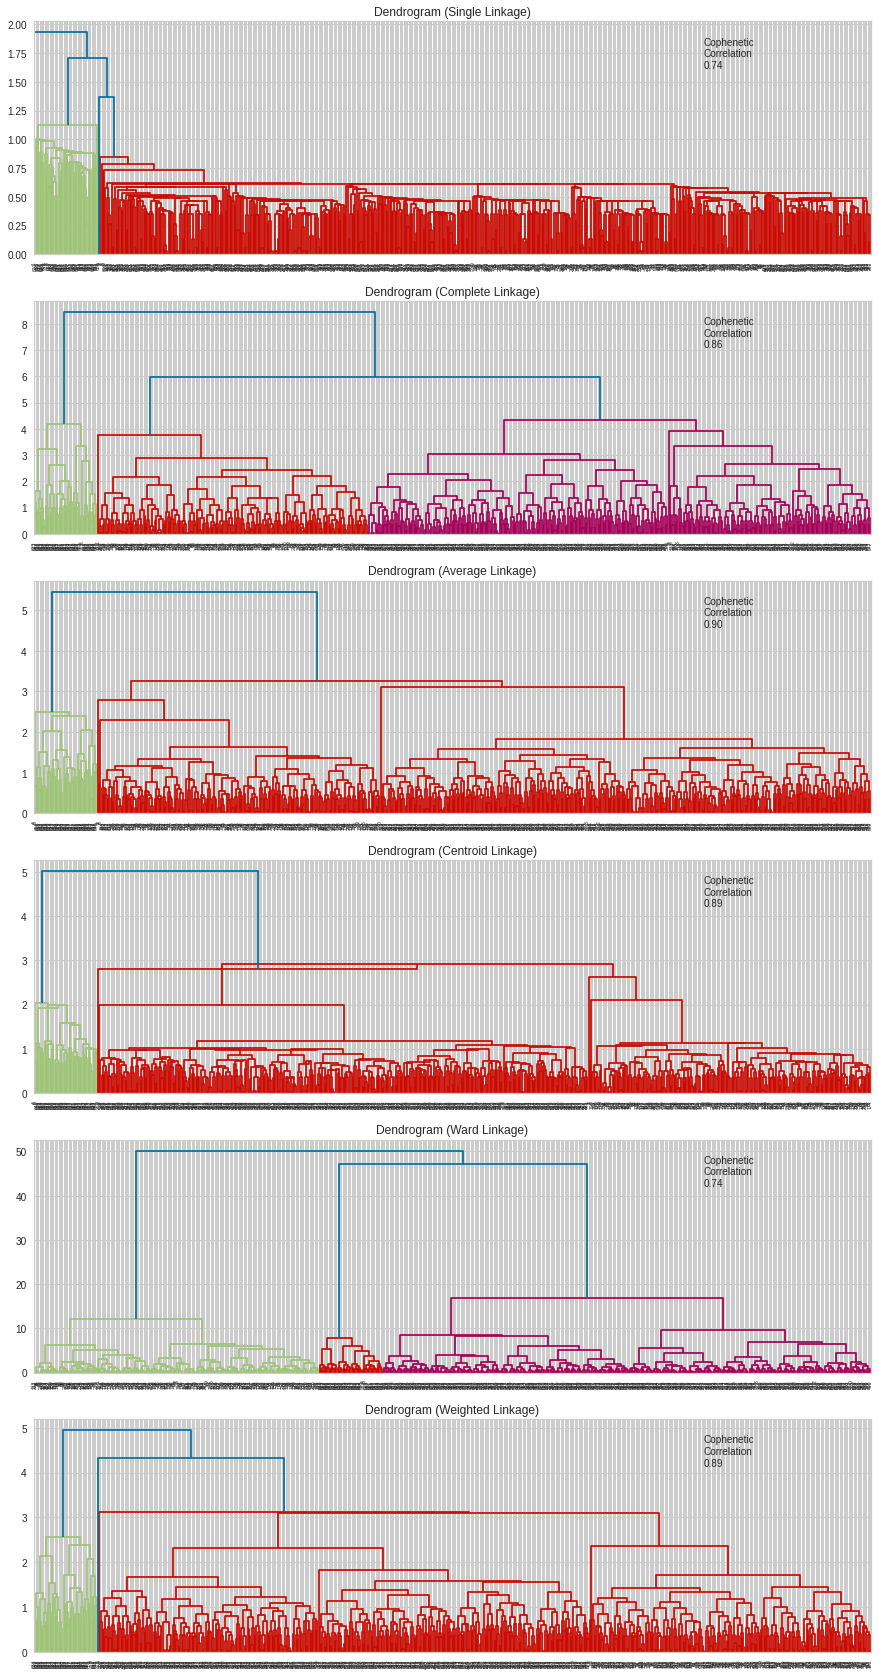

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_z_score, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_z_score))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

* The largest cophenetic correlation is average (0.90), centroid and weighted (both 0.89) linkage methods
* This supports that 3 is the best number of clusters as all the highest cophenetic correlations are based on 3 clusters

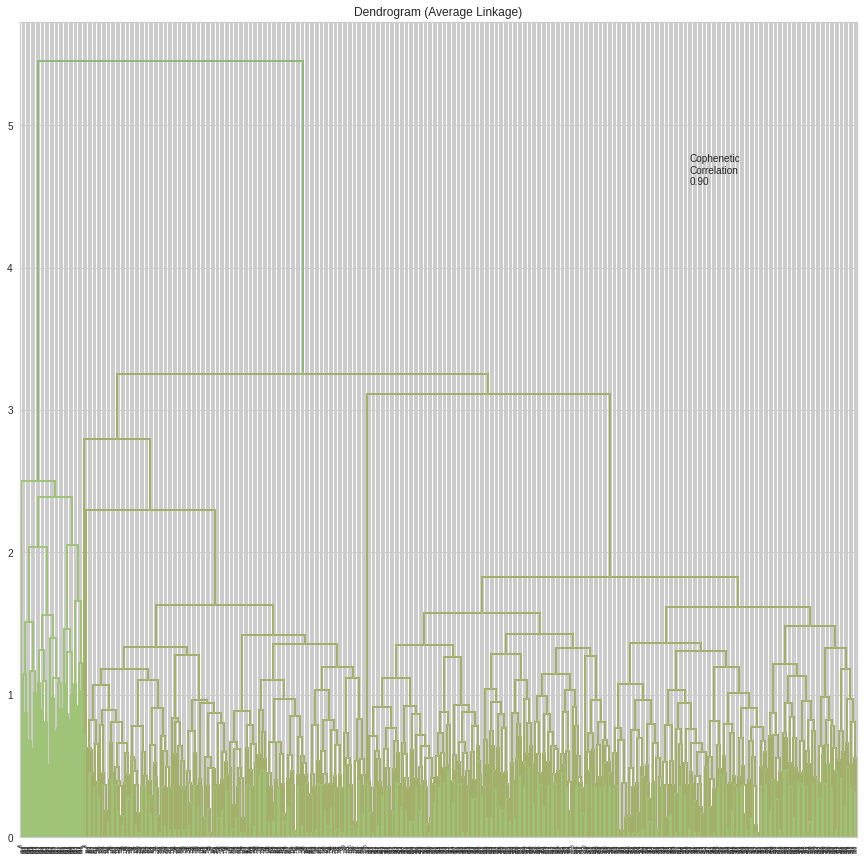

In [ ]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_z_score, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(data_z_score))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=7.3, c="red", lw=1, linestyle="dashdot")

In [ ]:
HC = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HC.fit(data_z_score)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
data_z_score["HC_Clusters"] = HC.labels_
data["HC_Clusters"] = HC.labels_

In [ ]:
cluster_profile = data.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (data.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values)

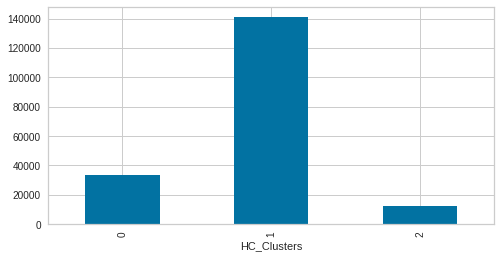

In [ ]:
# Checking the groups for Avg_Credit_Limit
cluster_profile['Avg_Credit_Limit'].groupby('HC_Clusters').mean().plot.bar(figsize=(8,4));

In [ ]:
#Display cluster profiles
cluster_profile.style.highlight_max(color="green", axis=0).highlight_min(color='red')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,0.002584,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,1.000000,223


In [ ]:
#Values of the Avg Credit Limit in each cluster
for cl in data["HC_Clusters"].unique():
    print("In cluster {}, the following Avg Credit Limits are present:".format(cl))
    print(data[data["HC_Clusters"] == cl]["Avg_Credit_Limit"].unique())
    print()

In cluster 0, the following Avg Credit Limits are present:
[100000  50000  30000  10000   8000  17000  19000  20000  13000  16000
  12000   5000   7000  11000   9000  18000   6000  15000  14000  73000
  49000  67000  61000  75000  48000  56000  72000  70000  51000  69000
  40000  44000  31000  37000  65000  46000  74000  58000  39000  52000
  33000  47000  71000  41000  59000  64000  45000  54000  66000  27000
  43000  36000  25000  57000  26000  38000  35000  34000  28000  63000
  29000  68000  42000  62000  32000  60000  55000]

In cluster 2, the following Avg Credit Limits are present:
[50000 20000 15000  5000  3000 10000 13000 11000  9000  6000  8000 19000
 16000 18000 17000 14000 12000  7000]

In cluster 1, the following Avg Credit Limits are present:
[100000 157000  94000 163000 131000  96000 136000 121000 158000 108000
 166000 176000 178000  91000 156000 146000  84000 155000 200000 195000
 187000 106000 114000 126000 173000 153000 184000 123000 144000  97000
  98000 127000 17100

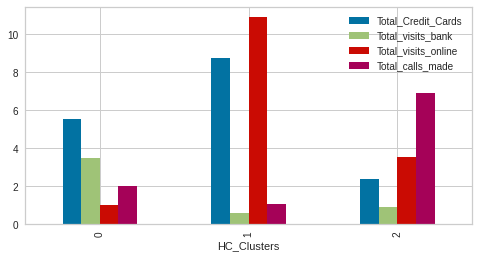

In [ ]:
# Checking the groups for the remainder features
cluster_profile[['Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made']].groupby('HC_Clusters').mean().plot.bar(figsize=(8,4));

**Observations**

*   Total_Credit_cards make up the largest feature in Cluster 0, followed by total_visits_bank, total_calls_made, and total_visits_onlne
*   Total_visit_online make up the largest feature in Cluster 1, followed by , total_calls_made, and total_visits_bank
*   Total_calls_made make up the largest feature in Cluster 2, followed by total_visits_bank, total_credit_card, and total_calls_made 



**Comparing cluster K-means clusters and Hierarchical Clusters**

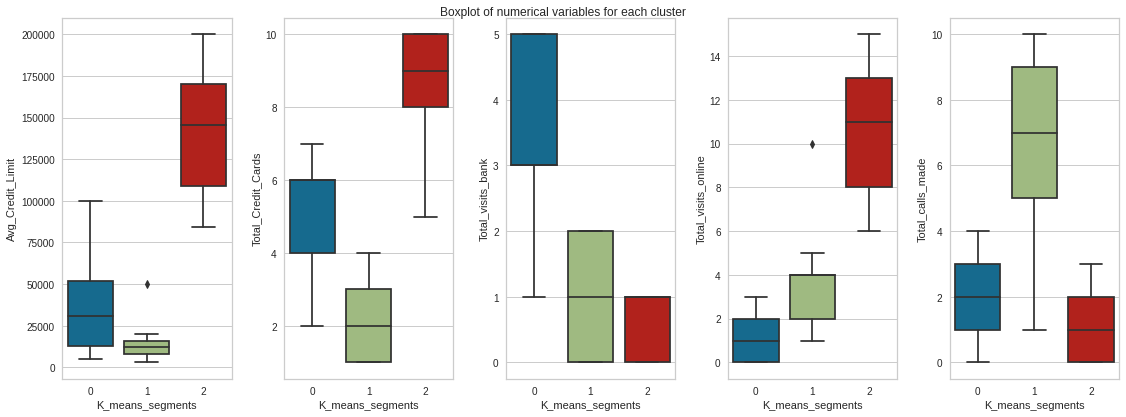

In [ ]:
#KMeans
list_columns =  cluster_profile.columns
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for a in range(5):
    sns.boxplot(ax = axes[a], y = data[list_columns[counter]], x = data['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

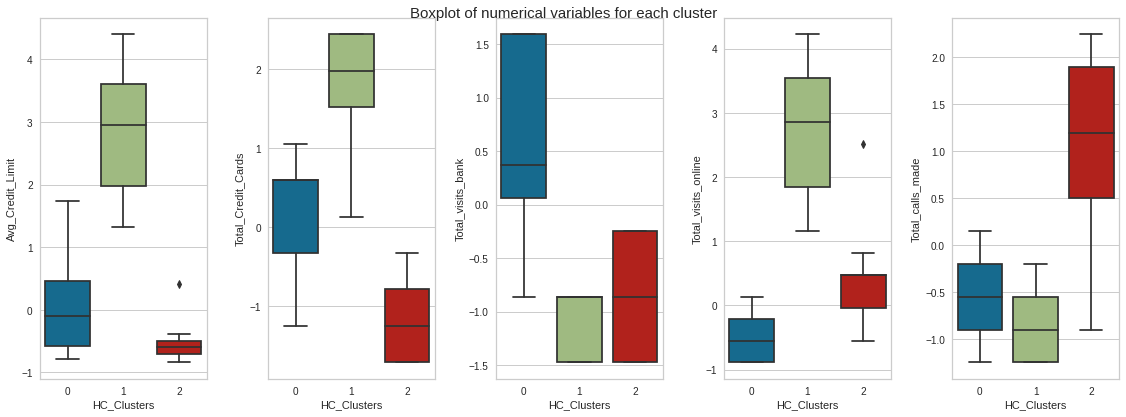

In [ ]:
#HC_Cluster
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=15)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_z_score[list_columns[counter]],x=data_z_score['HC_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### **Observations**

**Avg_Credit_Limit**
*   There are more customers in the KMean segments then there is in the HC_Clusters for Cluster 0
*   There are more customers in the HC_Clusters then there is in the KMean segments for Cluster 1

**Total_Credit_Cards**

* There are more customers in the HC_Clusters then there is in the KMean segments for Cluster 1
* There are less customers in the HC_Clusters then there is in the KMean segments for Cluster 2

**Total_Visits_Bank**
*   There are more customers in the KMean segments then there is in the HC_Clusters for Cluster 1
* There are more customers in the HC_Clusters then there is in the KMean segments for Cluster 2

**Total_Visits_Online**

* There are more customers in the HC_Clusters then there is in the KMean segments for Cluster 2
* There are more customers in the HC_Clusters then there is in the KMean segments for Cluster 1

**Total_calls_made**

* There are more customers in the HC_Clusters then there is in the KMean segments for Cluster 2
* There are more customers in the HC_Clusters then there is in the KMean segments for Cluster 1

<hr>

**Conclusion and Recommendations**

**Cluster 0**

* Customers in this cluster have an medium Avg_Credit_Limit and generally visit the bank more in person than utilizing calls and online banking. This could be a good opportunity to promote online banking services to reduce wait times and improve customer satisifaction.


**Cluster 1**

* The Avg_Credit_Limit is better when using the KMeans clustering as opposed to hierarchial clustering. With the KMeans clustering, the customers seem to prefer calling the bank more frequently but also utilize online banking. Since they call more frequently, this may be a good opportunity to build customer relationships with account managers to help sell new services and products. Additionally, many people who call customer service lines are more likely dissatisified with something and this could be a good opportunity to improve processes and overall customer experience. 

**Cluster 2**

The Avg_Credit_Limit is the largest and these customers prefer to use online banking. Since they are more likely to use online banking, the marketing team should focus on online promotions to promote new services and products.

